## Predict whether a student gets admitted to university based on exam scores.

## 1. Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## 2. Load dataset


In [15]:
df = pd.read_csv("student_admission_dataset.csv")
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


In [16]:
df.head(10)

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
5,3.52,1476,9,Accepted
6,3.84,1002,8,Rejected
7,2.63,975,6,Waitlisted
8,3.13,1450,8,Waitlisted
9,2.54,1118,7,Rejected


In [17]:
df.describe

<bound method NDFrame.describe of       GPA  SAT_Score  Extracurricular_Activities Admission_Status
0    3.46       1223                           8         Rejected
1    2.54        974                           8         Rejected
2    2.91        909                           9         Rejected
3    2.83       1369                           5         Accepted
4    3.60       1536                           7         Accepted
..    ...        ...                         ...              ...
245  3.57       1024                           3         Rejected
246  2.86       1367                           1       Waitlisted
247  3.09       1036                           3       Waitlisted
248  3.51       1375                           5       Waitlisted
249  2.95       1583                           1       Waitlisted

[250 rows x 4 columns]>

## 3.Check for any missing values

In [18]:
df.isnull().sum()

GPA                           0
SAT_Score                     0
Extracurricular_Activities    0
Admission_Status              0
dtype: int64

In [20]:
print(df.columns)

Index(['GPA', 'SAT_Score', 'Extracurricular_Activities', 'Admission_Status'], dtype='object')


## 4.Define Features and Target for Admission Prediction

In [21]:
# Features & Target
X = df[["GPA", "SAT_Score", "Extracurricular_Activities"]]
y = df["Admission_Status"]

## 5. Visualize dataset (pairplot to see relationships)


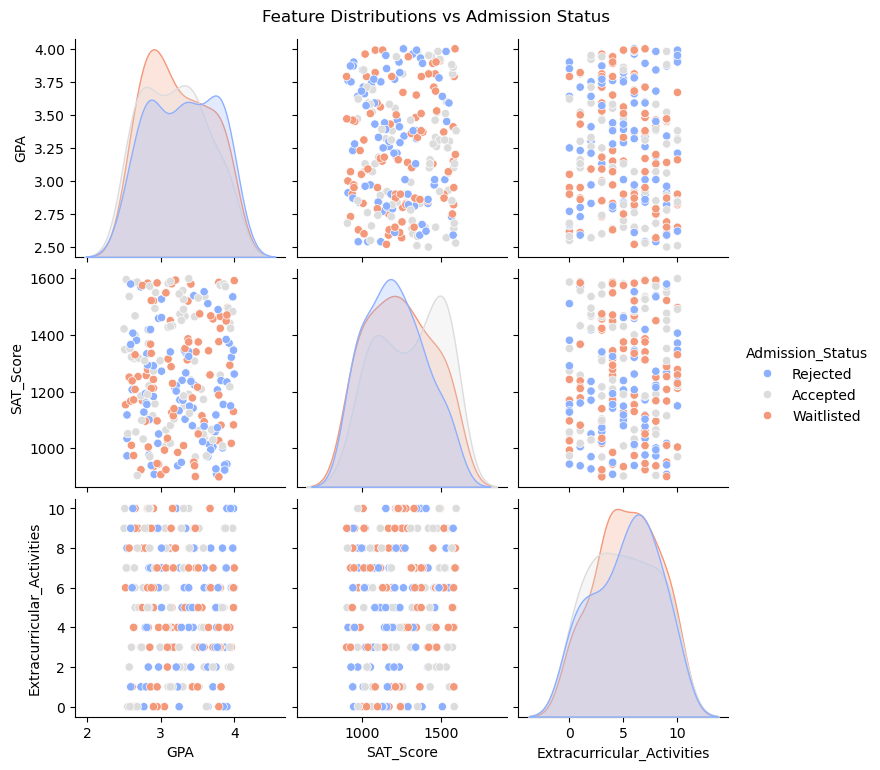

In [32]:
sns.pairplot(df, hue="Admission_Status", vars=["GPA", "SAT_Score", "Extracurricular_Activities"], palette="coolwarm")
plt.suptitle("Feature Distributions vs Admission Status", y=1.02)
plt.show()

## 6.Split Dataset into Training and Testing Sets for Logistic Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression(max_iter=1000)  # increase iterations for convergence
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 7.Evaluate Model Accuracy on Test Data

In [25]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.34

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [29]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Accepted       0.36      0.57      0.44        14
    Rejected       0.39      0.39      0.39        18
  Waitlisted       0.20      0.11      0.14        18

    accuracy                           0.34        50
   macro avg       0.32      0.36      0.33        50
weighted avg       0.31      0.34      0.32        50



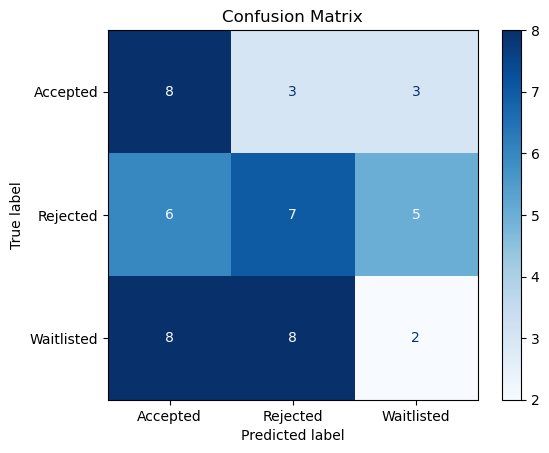

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()